# Question 6
Consider the simple function $R(\beta) = \sin(\beta) + \beta /10$.
1. Draw a graph of this function over the range $\beta ∈ [−6, 6]$.
1. What is the derivative of this function?
1. Given $\beta_0 = 2.3$, run gradient descent to find a local minimum of $R(\beta)$ using a learning rate of $\rho = 0.1$. Show each of $\beta^0, ­\beta^1, \dots$ in your plot, as well as the final answer.
1. Repeat with $\beta_0 = 1.4$.

## 1 & 2

In [1]:
import numpy as np
import hvplot.pandas
import polars as pl

beta = np.linspace(-6, 6, 400)
R_beta = np.sin(beta) + beta / 10
d_R_beta_comp = (R_beta[1:] - R_beta[:-1]) / (beta[1:] - beta[:-1])
d_R_beta_comp = np.concatenate([[d_R_beta_comp[0]], d_R_beta_comp])
d_R_beta_actual = np.cos(beta) + 1 / 10
df = pl.DataFrame({"beta": beta, "R_beta": R_beta, "d_R_beta_comp": d_R_beta_comp, "d_R_beta_actual": d_R_beta_actual})
df.plot.line(x = "beta", y = ["R_beta", "d_R_beta_comp"])

:NdOverlay   [Variable]
   :Curve   [beta]   (value)

## 3

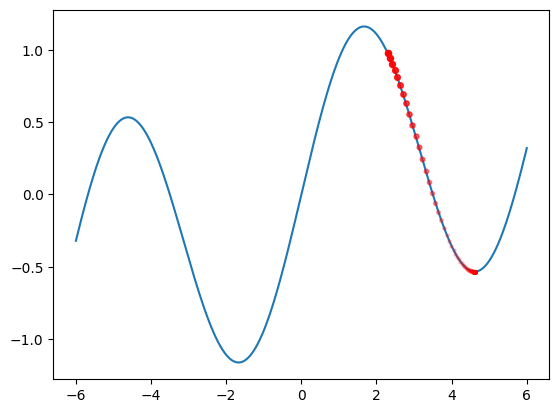

In [2]:
import matplotlib.pyplot as plt

def func(beta):
    return np.sin(beta) + beta / 10

def dfunc(beta):
    return np.cos(beta) + 1 / 10

betas = [2.3]
vals = [func(betas[0])]
lr = 0.1
val = func(betas[0])
dval = dfunc(betas[0])

val, dval

while True:
    betas.append(betas[-1] - lr * dval)
    vals.append(func(betas[-1]))
    dval = dfunc(betas[-1])
    if abs(dval) < 1e-4 or len(betas) > 10_000:
        break

plt.plot(beta, func(beta))
for i, (b, v) in enumerate(zip(betas, vals)):
    s = 20 - (15 * min(i, 20)) / 20
    alpha = 1 - (0.8 * min(i, 20)) / 20
    plt.scatter(b, v, c = "red", s=s, zorder = 10, alpha=alpha)

## 4

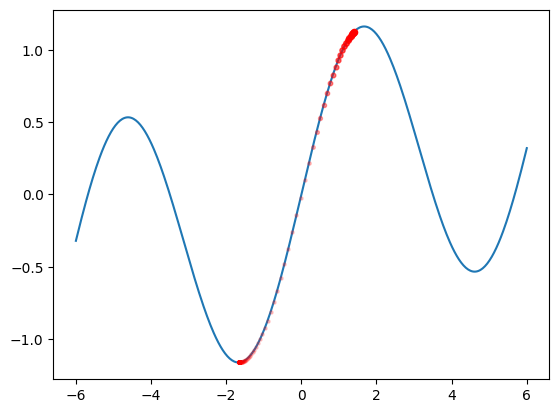

In [3]:
import matplotlib.pyplot as plt

def func(beta):
    return np.sin(beta) + beta / 10

def dfunc(beta):
    return np.cos(beta) + 1 / 10

betas = [1.4]
vals = [func(betas[0])]
lr = 0.1
val = func(betas[0])
dval = dfunc(betas[0])

val, dval

while True:
    betas.append(betas[-1] - lr * dval)
    vals.append(func(betas[-1]))
    dval = dfunc(betas[-1])
    if abs(dval) < 1e-4 or len(betas) > 10_000:
        break

plt.plot(beta, func(beta))
for i, (b, v) in enumerate(zip(betas, vals)):
    s = 20 - (15 * min(i, 20)) / 20
    alpha = 1 - (0.8 * min(i, 20)) / 20
    plt.scatter(b, v, c = "red", s=s, zorder = 10, alpha=alpha)